<a href="https://colab.research.google.com/github/aliciawill/BigData/blob/master/%EB%B8%8C%EB%9F%B0%EC%B9%98_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.데이터 불러오기

In [97]:
# google drive에 공유한 파일을 불러온다.

path = '/content/drive/MyDrive/0-MULTI-2/문제-표 1.csv'
df = pd.read_csv(path)
df.head()

,일자,확진자수,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,7/1/30,3072.0,NaN,NaN,NaN
1,7/2/30,3156.0,NaN,NaN,NaN
2,7/3/30,2964.0,NaN,NaN,NaN
3,7/4/30,3210.0,NaN,NaN,NaN
4,7/5/30,3075.0,NaN,NaN,NaN


### 2.Timestamp 객체로 변환
- 대여일시(rent_dt)열과 반납일시(return_dt)열을 Timestamp 객체로 변환
- 데이터 형식은 datetime64 

In [98]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [99]:
df['day'] = pd.to_datetime(df['일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      146 non-null    object        
 1   확진자수    139 non-null    float64       
 2   day     146 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.5+ KB


In [48]:
df.head()

,일자,확진자수,day
0,7/1/30,3072.0,2030-07-01
1,7/2/30,3156.0,2030-07-02
2,7/3/30,2964.0,2030-07-03
3,7/4/30,3210.0,2030-07-04
4,7/5/30,3075.0,2030-07-05


### 3.DatetimeIndex 설정
반납일시(rent_dt) 열을 인덱스로 설정

In [100]:
df.set_index('day', drop=True, inplace=True)
df.head()

,일자,확진자수
day,,
2030-07-01,7/1/30,3072.0
2030-07-02,7/2/30,3156.0
2030-07-03,7/3/30,2964.0
2030-07-04,7/4/30,3210.0
2030-07-05,7/5/30,3075.0


In [101]:
df.drop(['일자'], axis=1, inplace=True)

In [53]:
df_sort = df.sort_index()
df_sort

,확진자수
day,
2030-07-01,3072.0
2030-07-02,3156.0
2030-07-03,2964.0
2030-07-04,3210.0
2030-07-05,3075.0
...,...
2030-11-19,NaN
2030-11-20,NaN
2030-11-21,NaN


### 4.시계열의 표현

#### 4.1 시점

In [102]:
# loc 인덱서 활용
df.loc['2030-07-01']

확진자수    3072.0
Name: 2030-07-01 00:00:00, dtype: float64

In [103]:
# at_time 메소드 활용
df.at_time('2023-07-20')

,확진자수
day,
2030-07-01,3072.0
2030-07-02,3156.0
2030-07-03,2964.0
2030-07-04,3210.0
2030-07-05,3075.0
...,...
2030-11-19,NaN
2030-11-20,NaN
2030-11-21,NaN


#### 4.2 기간

In [104]:
# loc 인덱서 활용
df.loc['2030-07-01' : '2030-07-15']

,확진자수
day,
2030-07-01,3072.0
2030-07-02,3156.0
2030-07-03,2964.0
2030-07-04,3210.0
2030-07-05,3075.0
2030-07-06,2595.0
2030-07-07,2970.0
2030-07-08,4302.0
2030-07-09,4260.0


In [105]:
# first 메소드 활용
df_soft = df.sort_index()
df_sort.first('3D') 

,count
day,
2030-07-01,3072.0
2030-07-02,3156.0
2030-07-03,2964.0


#### 4.3 선형적 기간 집계
resample 메소드 활용

<Axes: xlabel='day'>

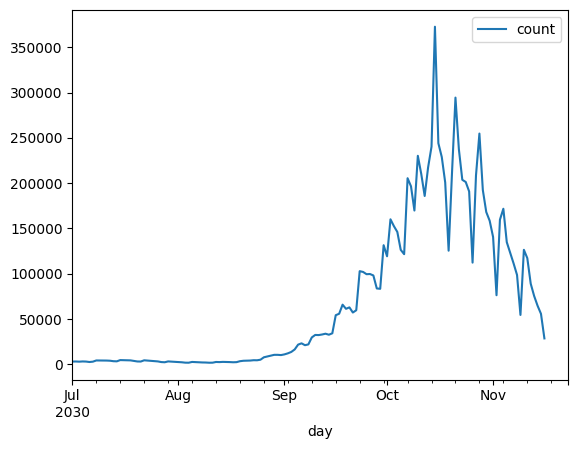

In [108]:
# 일별 따릉이 대여 건수 시각화
df_sort.plot()

In [115]:
df_soft.tail()

,확진자수
day,
2030-11-19,NaN
2030-11-20,NaN
2030-11-21,NaN
2030-11-22,NaN
2030-11-23,NaN


In [116]:
df_soft.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN

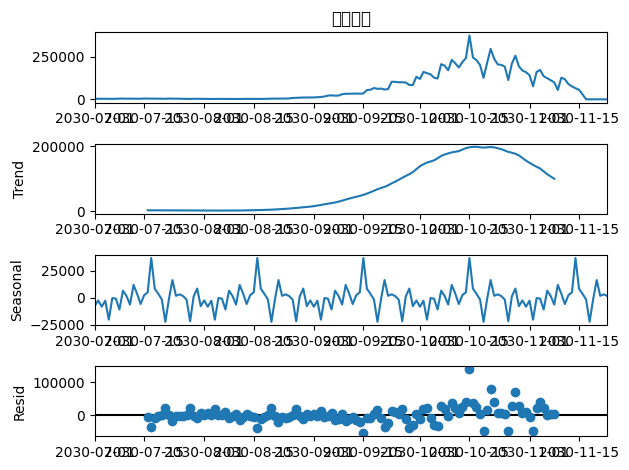

In [117]:
# 일별 따릉이 대여 건수 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose

s_revenue = df_soft.loc[:, '확진자수']
result = seasonal_decompose(s_revenue, model = 'addictive', period=30)
result.plot()
plt.show()

### 6.groupby 활용

#### 6.1 요일별 시간대별 대여 건수 
groupby메소드는 함수를 인수로 취할 수 있다. DatetimeIndex를 groupby 함수의 인수로 활용한다. 


#### 6.2 Top5 대여소의 1주일 간격 대여 건수
- 시계열을 포함하여 2개 열 기준으로 그룹화하려면 groupby 메소드를 써야 한다.
- resample 메소드는 시계열 열 1개만 그룹화 가능

In [119]:
# Top5 대여소의 인덱스 추출
loc_idx = df.확진자수.value_counts().sort_values(ascending=False).head().index
loc_idx

Float64Index([3738.0, 4182.0, 4458.0, 4569.0, 4704.0], dtype='float64')

In [120]:
# isin 메소드로 전체 데이터 프레임에서 Top5 대여소 선택
df_loc = df[df.확진자수.isin(loc_idx)]
df_loc

,확진자수
day,
2030-07-11,4182.0
2030-07-15,4704.0
2030-07-16,4569.0
2030-07-17,4458.0
2030-07-19,3738.0
2030-07-24,3738.0


In [121]:
# groupby 메소드로 Top5 대여소의 1주일 간격 대여 건수 집계
df_loc_cnt = df_loc.groupby(['확진자수', pd.Grouper(freq='W')]).size()

In [122]:
# unstack 메소드를 이용하여 피벗 테이블로 변환
df_loc_cnt.unstack('확진자수').style.highlight_max()

확진자수,3738.000000,4182.000000,4458.000000,4569.000000,4704.000000
day,,,,,
2030-07-14 00:00:00,nan,1.000000,nan,nan,nan
2030-07-21 00:00:00,1.000000,nan,1.000000,1.000000,1.000000
2030-07-28 00:00:00,1.000000,nan,nan,nan,nan
